# House Prices Kaggle Challenge

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#### Data Import

In [2]:
data_describe = open("data/data_description.txt")
contents = data_describe.read()
print(contents)
data_describe.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

### Exploratory Analysis

In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


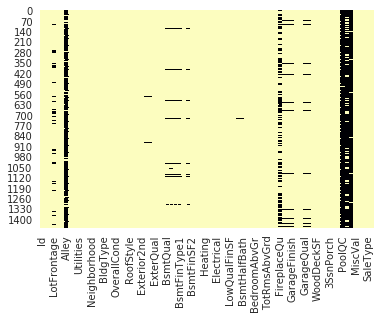

In [95]:
sns.heatmap(pd.isnull(test), cbar = False, cmap = "magma_r")

In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


With 1460 observations, and 81 variables, there is a pretty decent chance of overfitting if the models include all variables, so I may run some variable importance models at first to narrow down the useful variables in the set. I'll also be doing some correlation analysis for the same reason.

In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


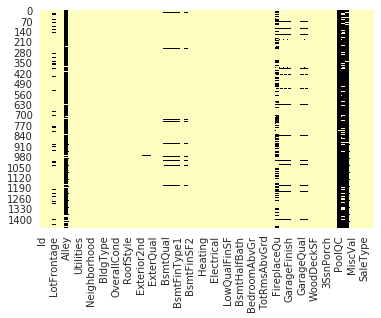

In [8]:
sns.heatmap(pd.isnull(train), cbar = False, cmap = "magma_r")

In [9]:
pd.set_option("display.max.columns", 999)
pd.isnull(train).cumsum().iloc[-1:,:]/1460

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1459,0.0,0.0,0.0,0.177397,0.0,0.0,0.937671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005479,0.005479,0.0,0.0,0.0,0.025342,0.025342,0.026027,0.025342,0.0,0.026027,0.0,0.0,0.0,0.0,0.0,0.0,0.000685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.472603,0.055479,0.055479,0.055479,0.0,0.0,0.055479,0.055479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995205,0.807534,0.963014,0.0,0.0,0.0,0.0,0.0,0.0


The above data frame show the percentage of missings for each variable. There are 6 variables which have more than 10% of their observations missing, 4 of which have missing percentages over 80%. Three variables are more than 90% missing are (Alley, PoolQC, and MiscFeature), while the Fence variable is just over 80% missing. The next most missing variable is the FireplaceQu variable, with 47.26% missing, and the final variable with more than 10% missing is LotFrontage at 17.74% missing. 

Although all other variables are less than 6% missing, there are a few patterns in the missings where certain variables are obviously linked. In the center of the plot above we have some clearly linked missing observations, as well as at the far right side of the plot. The center linked missing are all describing the basement of the house. The basementQc variable is NA when the house does not havea  basement, explaining the linkage. Simmilarly, those on the right hand side of the plot have to do with the garage, and again the garageQc variable is NA when there is no garage. 

The two of the three most missing variables, PoolQC and Alley, are again NA when the house is missing this feature. The other levels of these variables can be converted to graduated levels relatively logically. The MiscFeature variable contains multiple levels which have no logical numerical conversion. This variable may be usefully split into a dummy, as the levels are incredibly disparate (ie one level indicates if there is a shed where another indicates the presence of a tennis court.)

In [10]:
pd.isnull(test).cumsum().iloc[-1:,:]/1460

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1458,0.0,0.0,0.00274,0.155479,0.0,0.0,0.926027,0.0,0.0,0.00137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000685,0.000685,0.010959,0.010274,0.0,0.0,0.0,0.030137,0.030822,0.030137,0.028767,0.000685,0.028767,0.000685,0.000685,0.000685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00137,0.00137,0.0,0.0,0.0,0.0,0.000685,0.0,0.00137,0.0,0.5,0.052055,0.053425,0.053425,0.000685,0.000685,0.053425,0.053425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99726,0.800685,0.964384,0.0,0.0,0.0,0.000685,0.0


### Reviewing the Data

/home/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


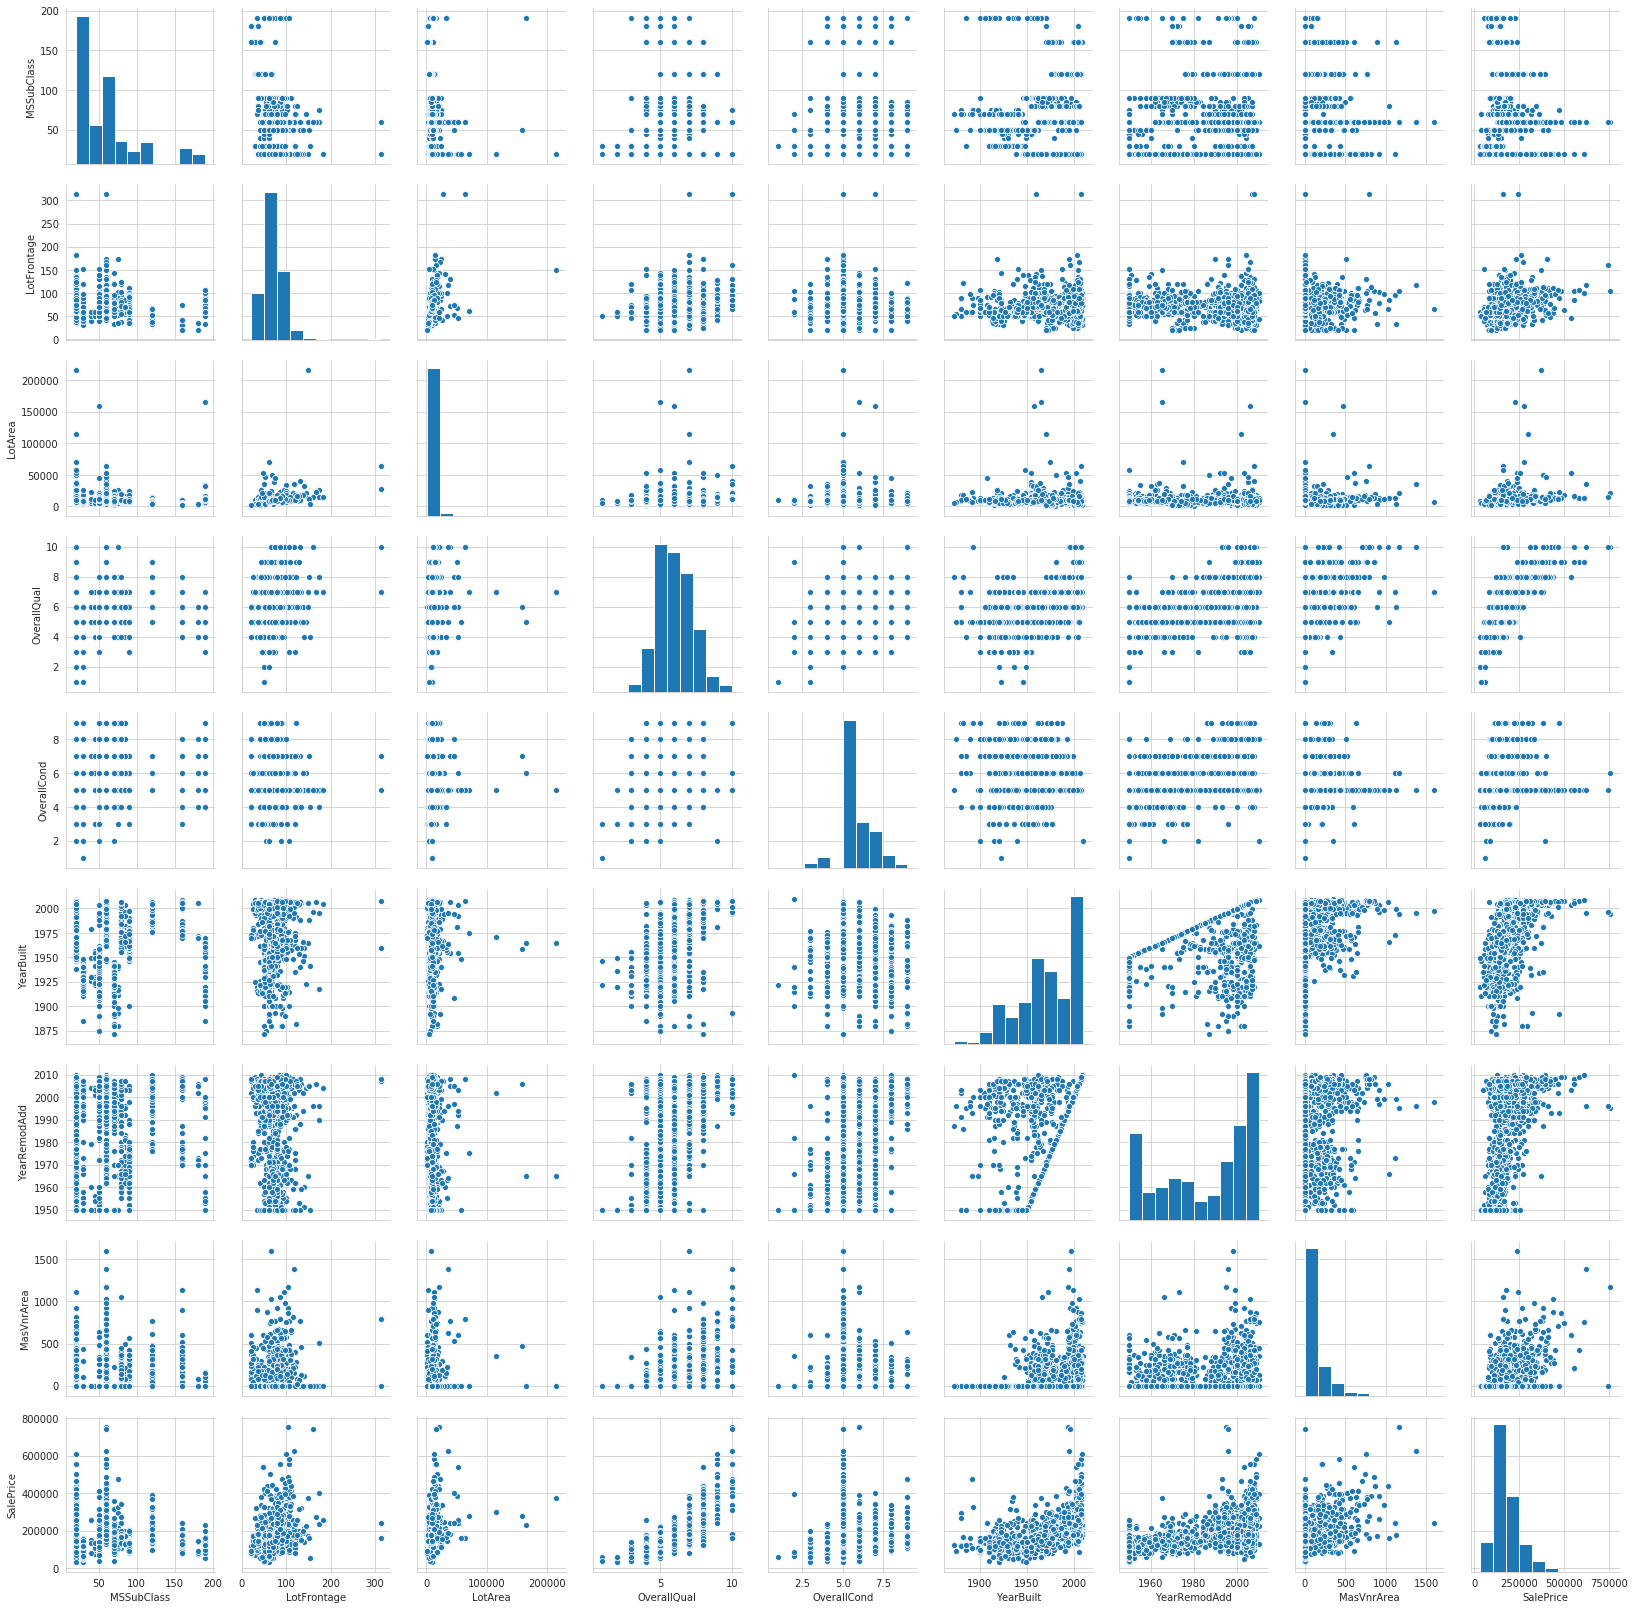

In [11]:
sns.pairplot(train.loc[:,["MSSubClass", "LotFrontage","LotArea","OverallQual","OverallCond","YearBuilt","YearRemodAdd","MasVnrArea", "SalePrice"]])

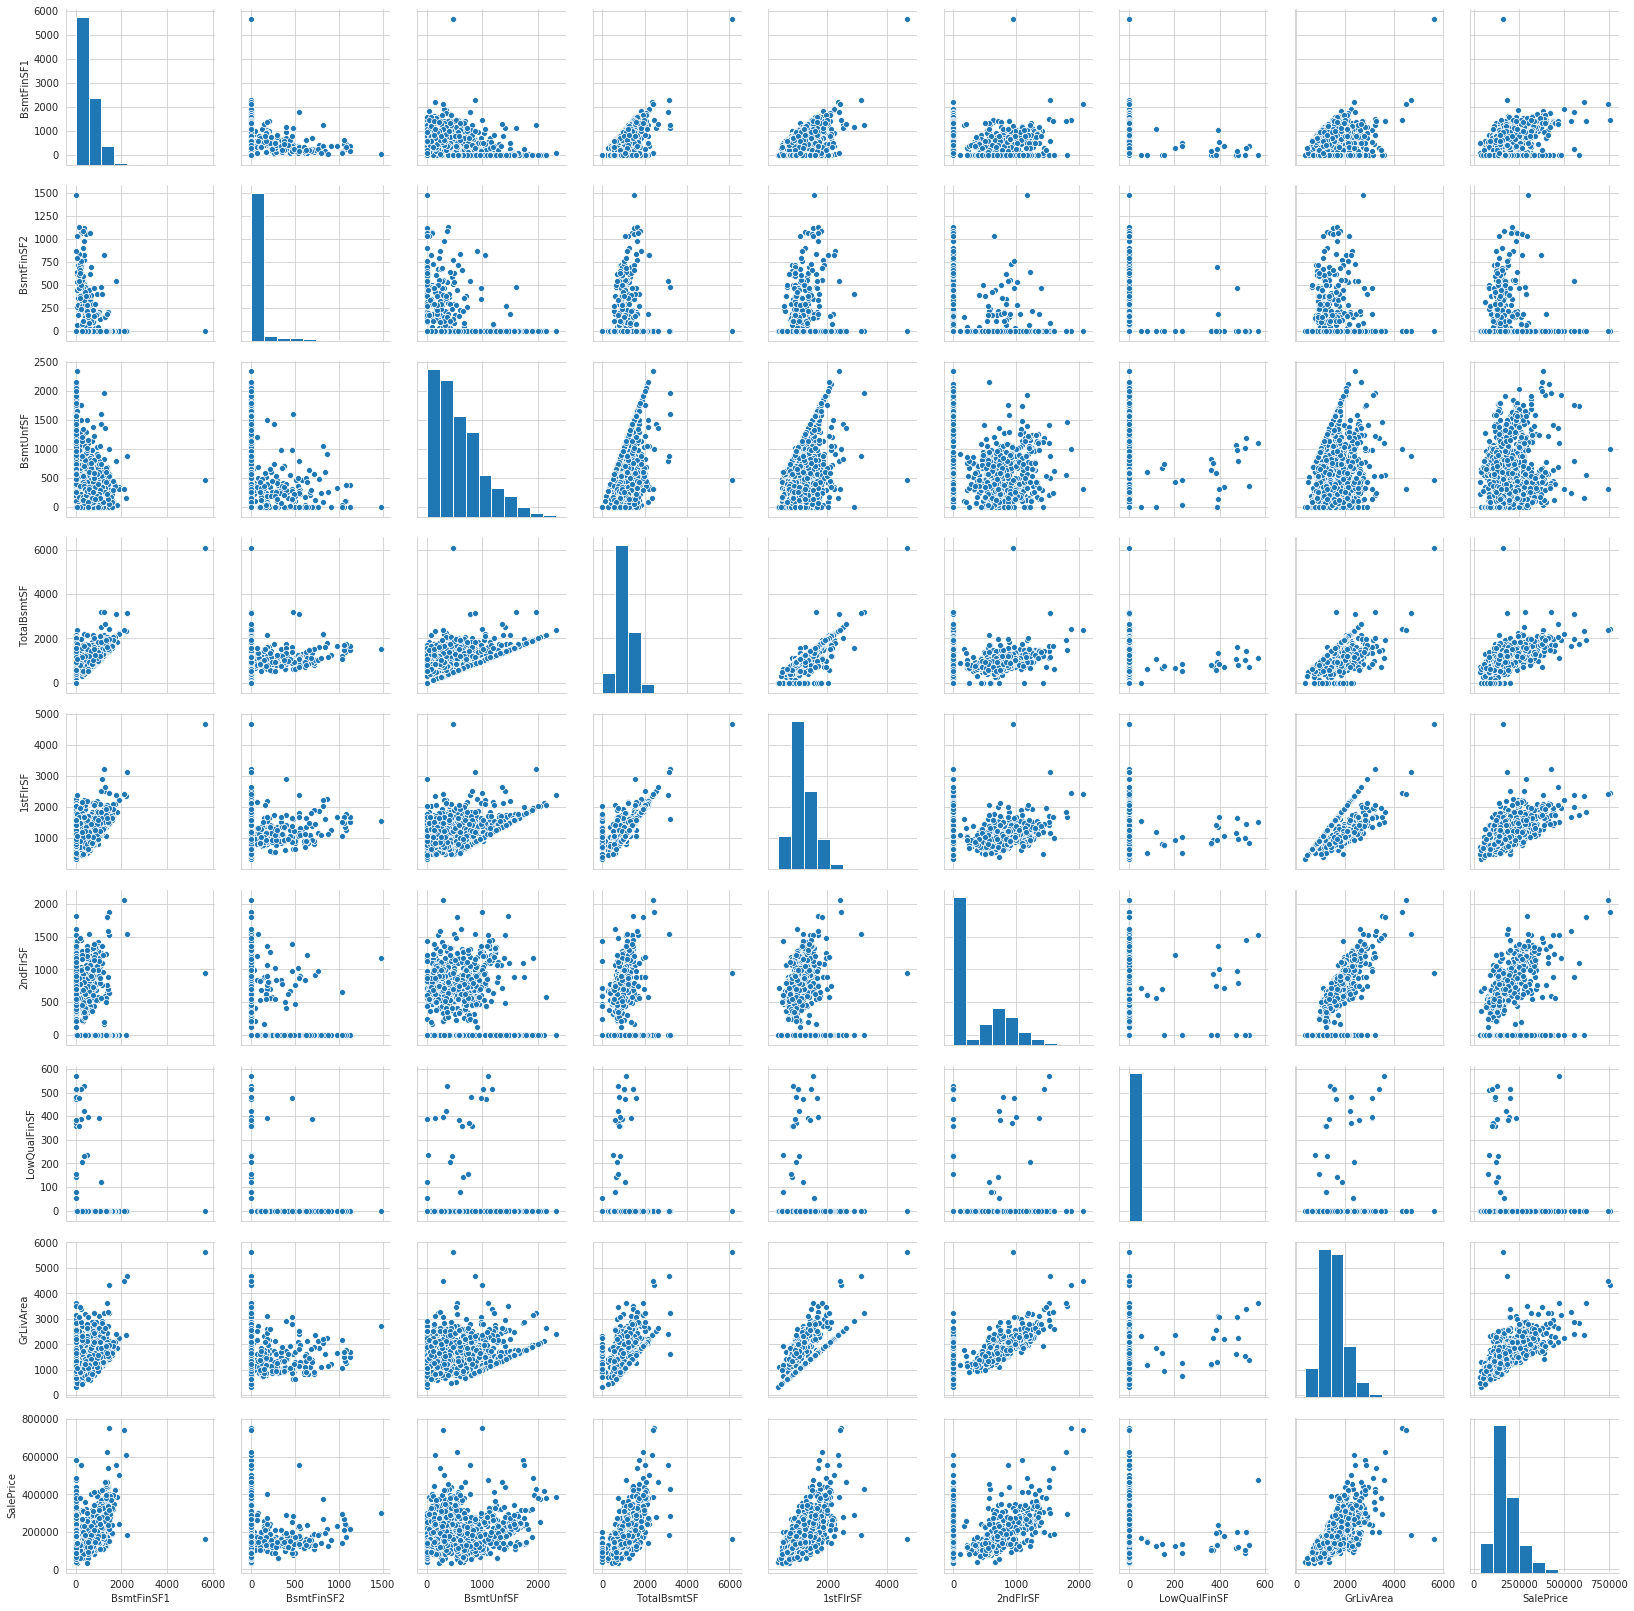

In [12]:
sns.pairplot(train.loc[:,["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","SalePrice"]])

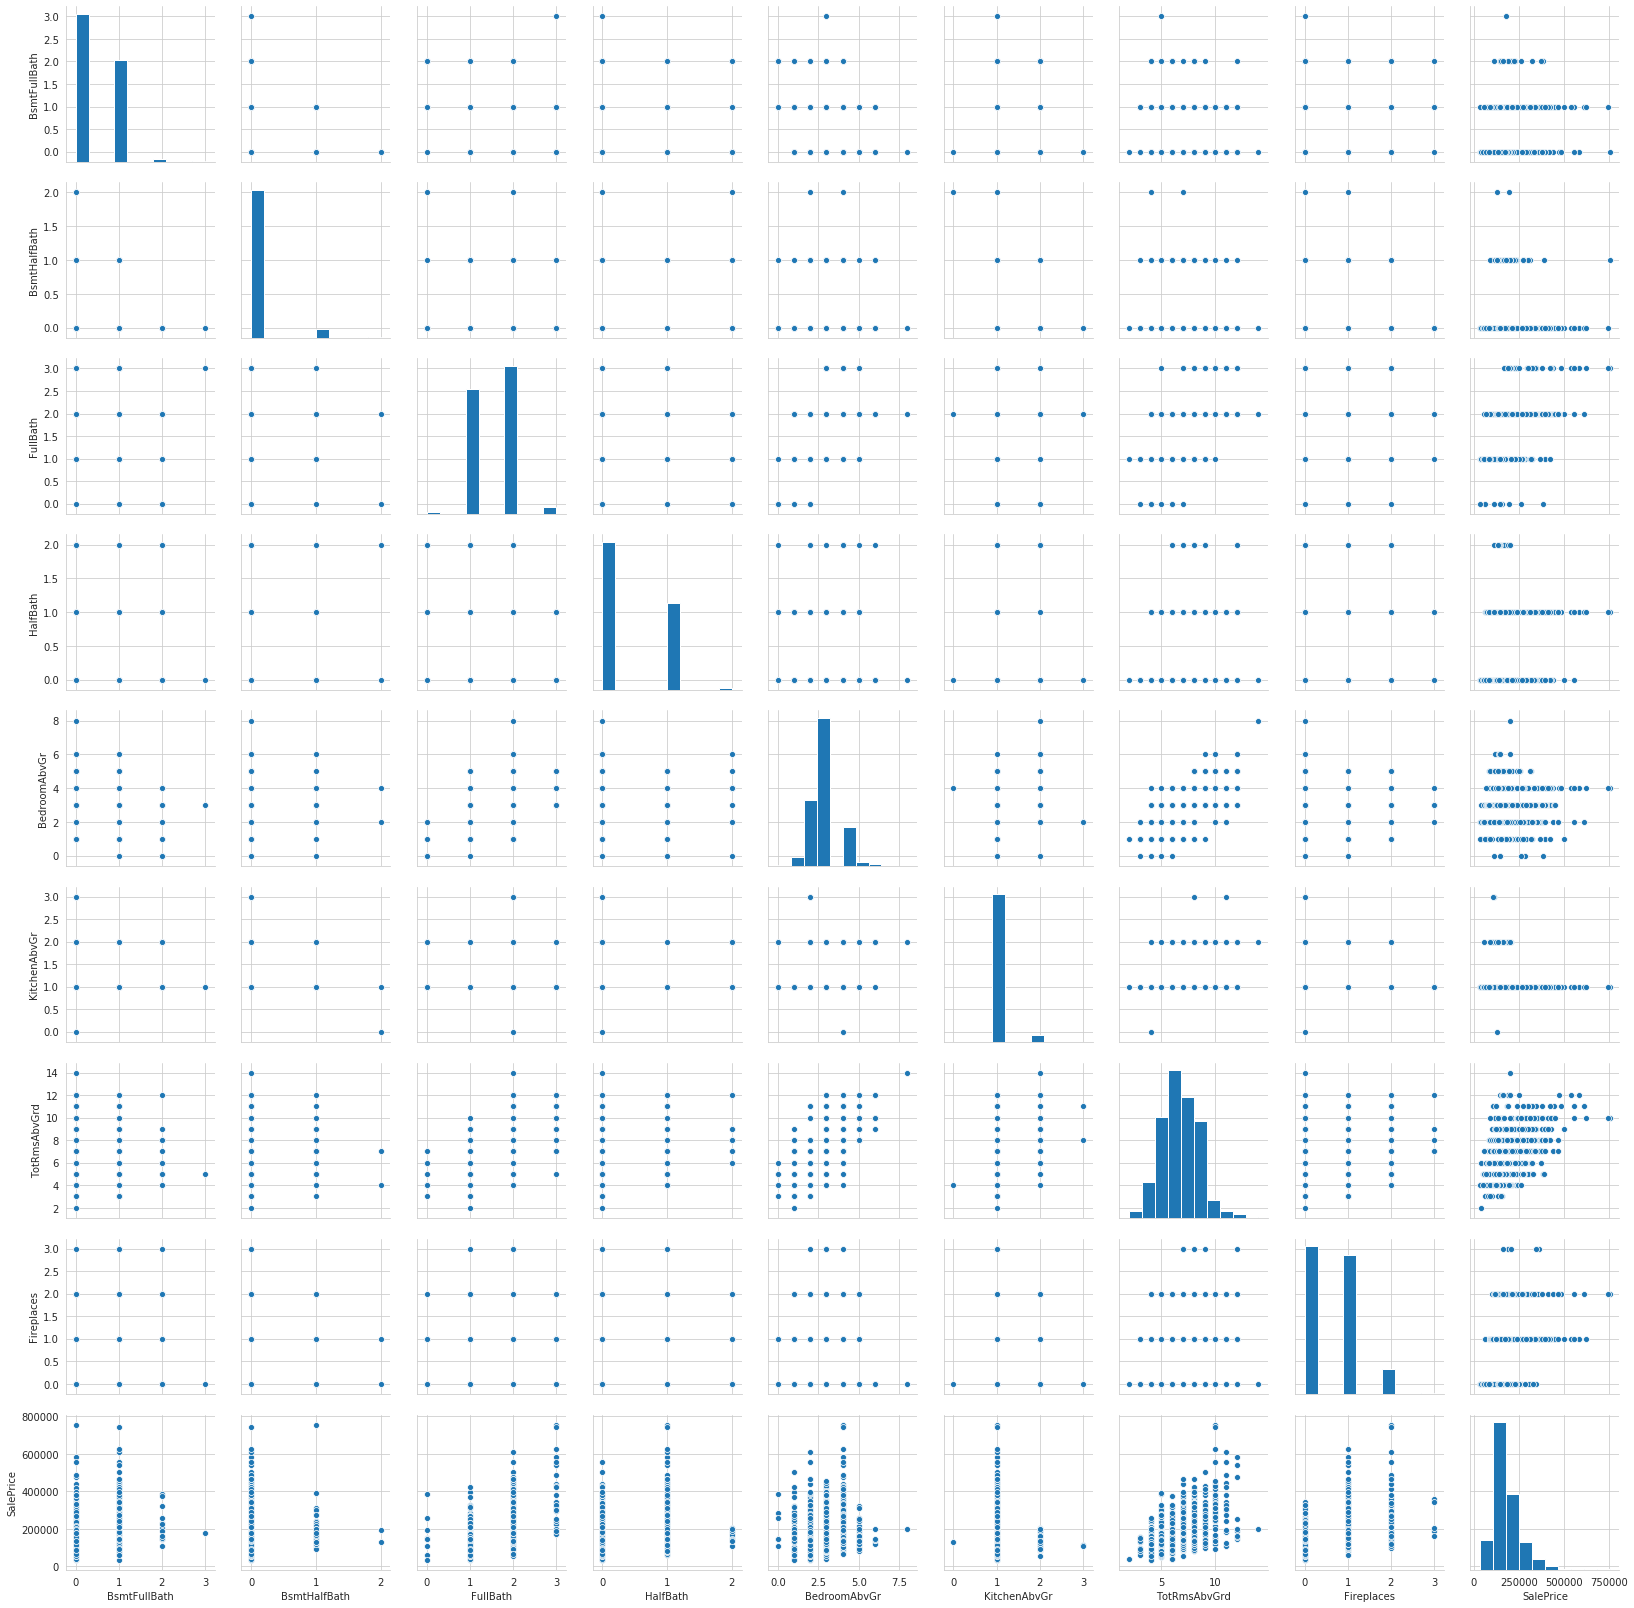

In [13]:
sns.pairplot(train.loc[:,["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces", "SalePrice"]])

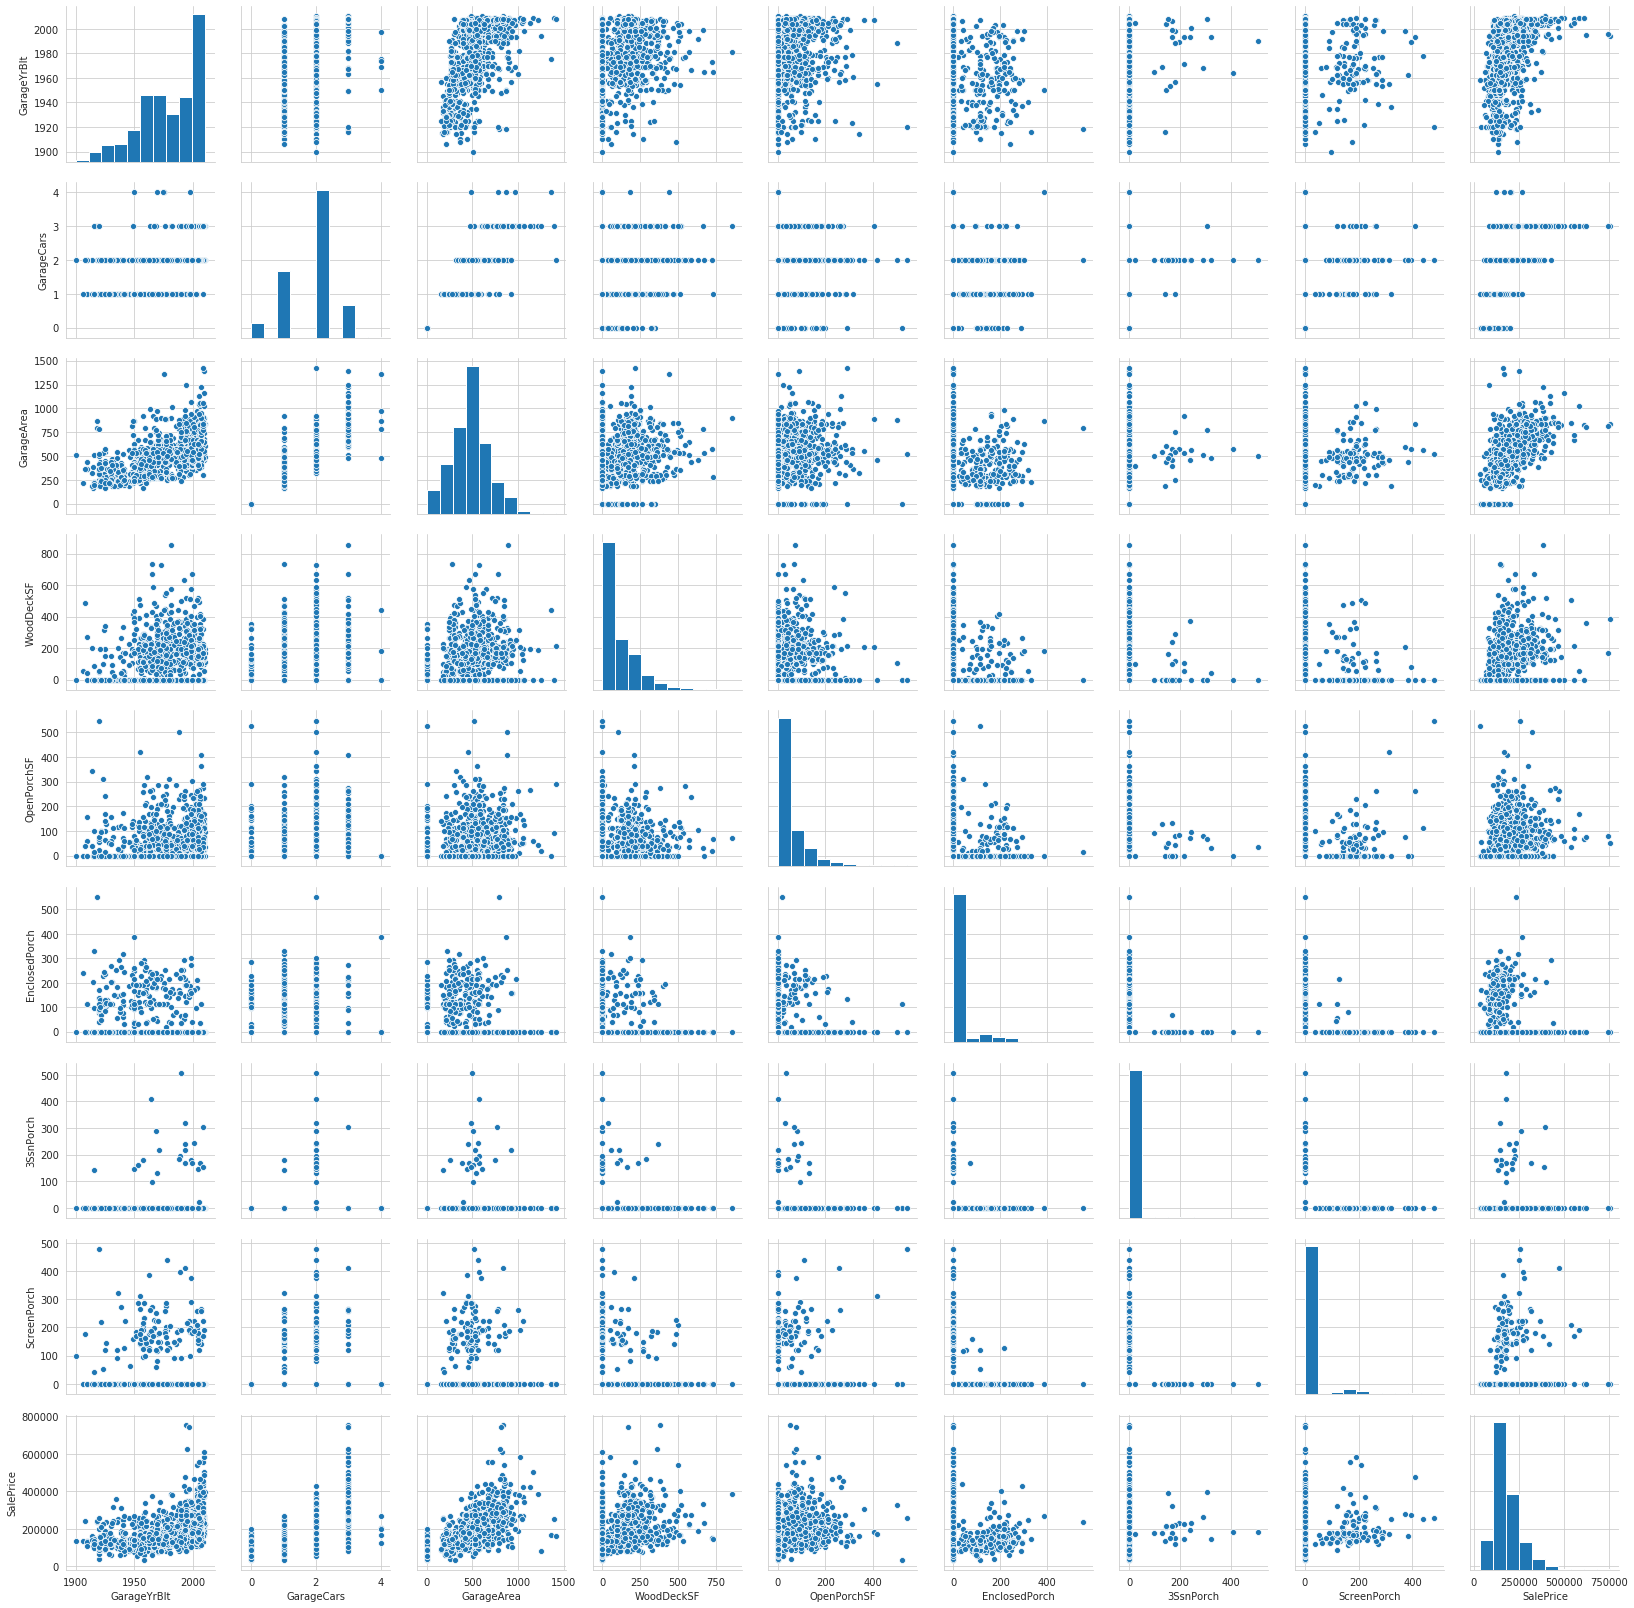

In [14]:
sns.pairplot(train.loc[:,["GarageYrBlt","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch", "SalePrice"]])

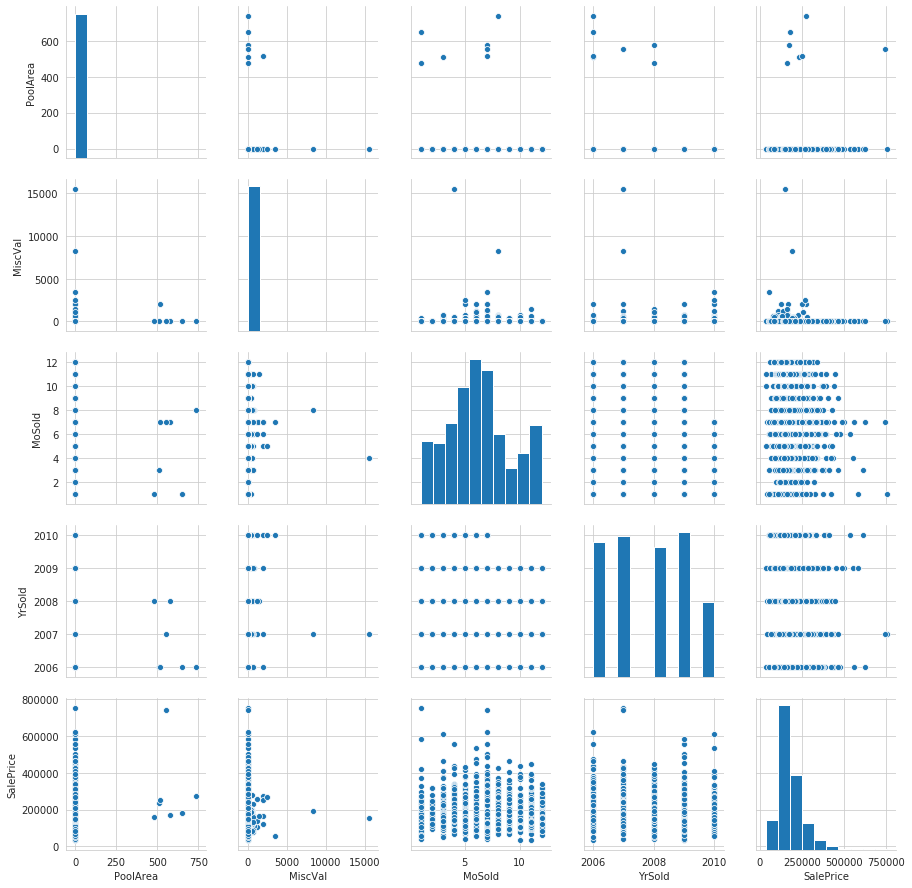

In [15]:
sns.pairplot(train.loc[:,["PoolArea","MiscVal","MoSold","YrSold","SalePrice"]])

## Review of Sales Price

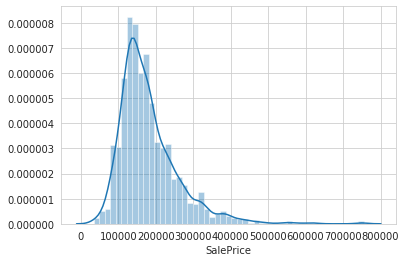

In [208]:
sns.distplot(train["SalePrice"])

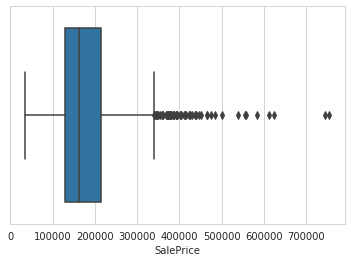

In [212]:
sns.boxplot(train["SalePrice"])

In [209]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [210]:
print("Skew of Sales Price: %f" % train["SalePrice"].skew())
print("Kurtosis of Sales Price: %f" % train["SalePrice"].kurtosis())

Skew of Sales Price: 1.882876
Kurtosis of Sales Price: 6.536282


### Correlation Analysis

In [284]:
corr = train.iloc[:,1:].corr()
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

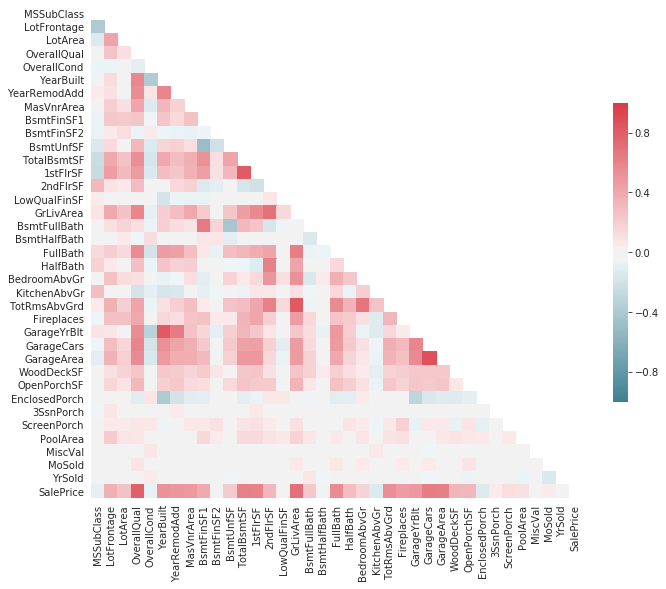

In [286]:
f, ax = plt.subplots(figsize=(11, 11))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask = mask, cmap = cmap,vmin = -1, vmax = 1, center = 0, square = True, cbar_kws={"shrink":0.5})

Correlation Analysis:

Although somewhat counter intuitive, I will first address those variables most weakly associated with Sales Price. I'm doing this as the majoriity of the variables (logically) are notably correlated with the Sales price, while there are very few which are weakly correlated with the sales price. 

Below are the variables which are most negatively correlated with the sales price, as well as those which are most weakly correlated. Negative and weak correlations are not generally connected, it merely happens that the weakest (closest to 0) correlations in this data set are often negative.

The variables witht eh absolute weakest correlation with Sales Price are BsmtFinSF2 (Type 2 finished basement SF), BsmtHalfBath (Number of half baths in the basement), MiscVal (Value of corresponding misc. feature), LowQualFinSF (Low Quality finished SF), YrSold (Year Sold), 3SsnPorch (Three season porch area in SF) , and MoSold (Month Sold).

In [287]:
corr["SalePrice"].sort_values(ascending = True)[1:16]

EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
Name: SalePrice, dtype: float64

Next, lets discuss those variables which are most highly correlated with the sales price.

The top 15 variables correlated with the sales price are listed above. The most highly correlated of these are Overall Quality, above ground living area, the size of the garage in car capacity, the area of the garage, total basement square footage, and the square footage of the first floor, respectively. 

In [288]:
corr["SalePrice"].sort_values(ascending = False)[1:16]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
Name: SalePrice, dtype: float64

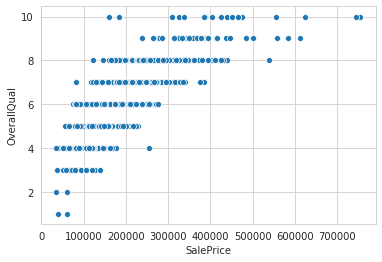

In [289]:
sns.scatterplot(train["SalePrice"], train["OverallQual"])

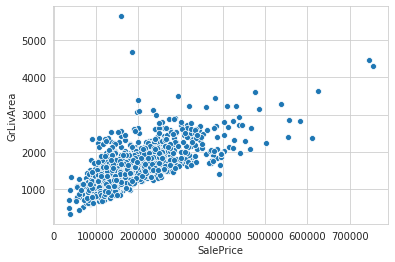

In [290]:
sns.scatterplot(train["SalePrice"], train["GrLivArea"])

There are also handful of other variables which are notably highly correlated with one another. Lets review.

First, we  review those variables which are most strongly linked with Sales Price, as these will play a large role in our later models. 

In [230]:
corr["OverallQual"].sort_values(ascending = False)[1:16]

SalePrice       0.790982
GarageCars      0.600671
GrLivArea       0.593007
YearBuilt       0.572323
GarageArea      0.562022
YearRemodAdd    0.550684
FullBath        0.550600
GarageYrBlt     0.547766
TotalBsmtSF     0.537808
1stFlrSF        0.476224
TotRmsAbvGrd    0.427452
MasVnrArea      0.411876
Fireplaces      0.396765
OpenPorchSF     0.308819
BsmtUnfSF       0.308159
Name: OverallQual, dtype: float64

In [232]:
corr["GrLivArea"].sort_values(ascending = False)[1:16]

TotRmsAbvGrd    0.825489
SalePrice       0.708624
2ndFlrSF        0.687501
FullBath        0.630012
OverallQual     0.593007
1stFlrSF        0.566024
BedroomAbvGr    0.521270
GarageArea      0.468997
GarageCars      0.467247
Fireplaces      0.461679
TotalBsmtSF     0.454868
HalfBath        0.415772
LotFrontage     0.402797
MasVnrArea      0.390857
OpenPorchSF     0.330224
Name: GrLivArea, dtype: float64

Above ground living area is very strongly correlated with the total number of above ground rooms. There is infact a pretty clear linear relationship between these two variables.

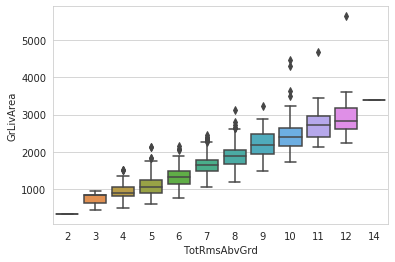

In [236]:
sns.boxplot(train["TotRmsAbvGrd"], train["GrLivArea"])

In [242]:
corr["GarageCars"].sort_values(ascending = False)[1:16]

GarageArea      0.882475
SalePrice       0.640409
OverallQual     0.600671
GarageYrBlt     0.588920
YearBuilt       0.537850
FullBath        0.469672
GrLivArea       0.467247
1stFlrSF        0.439317
TotalBsmtSF     0.434585
YearRemodAdd    0.420622
MasVnrArea      0.364204
TotRmsAbvGrd    0.362289
Fireplaces      0.300789
LotFrontage     0.285691
WoodDeckSF      0.226342
Name: GarageCars, dtype: float64

Here we see a very high correlation, logically, between the square footage of the garage and the number of cars fit in the garage. When reviewing the below boxplots, there appear to be a few outliers for the diffferent number of cars fit in the garage. Additionally, when considering the the relationship between the car capacity, although there seems to be a positive linear relationship between car capacity 0-3 and the sales price, the 4 car garages no longer seem to increase the price.

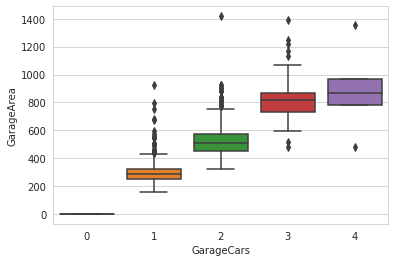

In [247]:
sns.boxplot(train["GarageCars"], train["GarageArea"])

In [248]:
train["GarageCars"].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

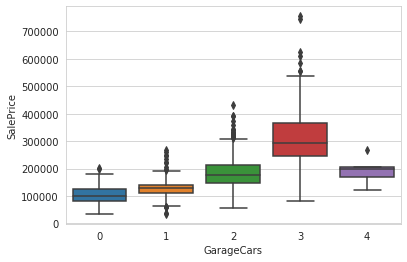

In [245]:
sns.boxplot(train["GarageCars"], train["SalePrice"])

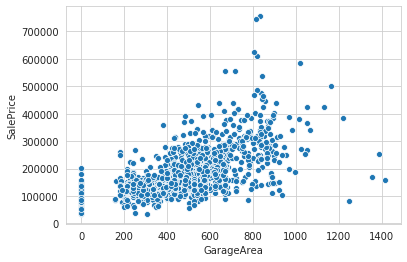

In [264]:
sns.scatterplot(train["GarageArea"], train["SalePrice"])

In [268]:
train["GarageArea"].sort_values(ascending = False)[:5]

1298    1418
581     1390
1190    1356
1061    1248
825     1220
Name: GarageArea, dtype: int64

In [278]:
train[train["GarageArea"] == 1418]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


Garage Year Built and Property Year Built: These two variables are very highly correlated (0.826), and when reviewed it becomes clear that, of their 1460 observations (81 of which are null for the Garage year built, indicating that the property has no garage) 1089, or 74.59%, of them are identical. Of the non-identical observations, 281 show that the garage was built after the property, while only 9 were built before the property was. These 9 were built anywhere from 1 to 10 years before the property.

In [203]:
train[train["GarageYrBlt"] < train["YearBuilt"]]["GarageYrBlt"]

29      1920.0
93      1900.0
324     1961.0
600     2003.0
736     1949.0
1103    1954.0
1376    1925.0
1414    1922.0
1418    1962.0
Name: GarageYrBlt, dtype: float64

In [197]:
sum(train["GarageYrBlt"].isnull())

81

In [220]:
train[train["GarageYrBlt"] < train["YearBuilt"]]["SalePrice"]

29       68500
93      133900
324     242000
600     275000
736      93500
1103    159500
1376     91000
1414    207000
1418    124000
Name: SalePrice, dtype: int64

### Numerical Variables

### Categorical Variables

#### MiscFeature

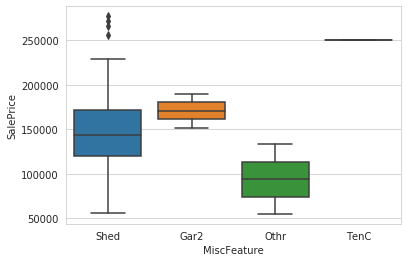

In [215]:
sns.boxplot(train["MiscFeature"], y = train["SalePrice"])

In [18]:
pd.value_counts(train["MiscFeature"])

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

#### MSSubClass

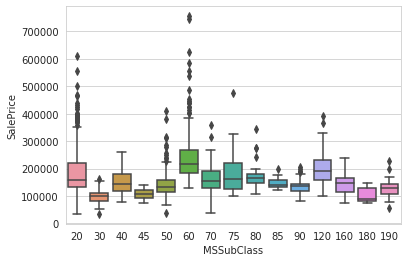

In [19]:
sns.boxplot(train["MSSubClass"], train["SalePrice"])

#### MSZoning

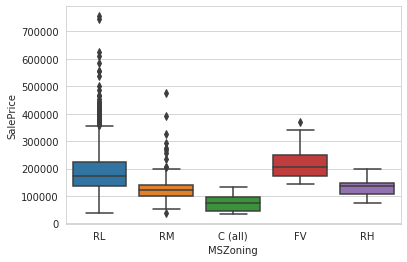

In [20]:
sns.boxplot(train["MSZoning"], train["SalePrice"])

#### Street & Alley

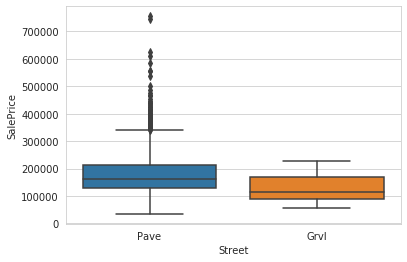

In [21]:
sns.boxplot(train["Street"], train["SalePrice"])

In [22]:
pd.value_counts(train["Street"])

Pave    1454
Grvl       6
Name: Street, dtype: int64

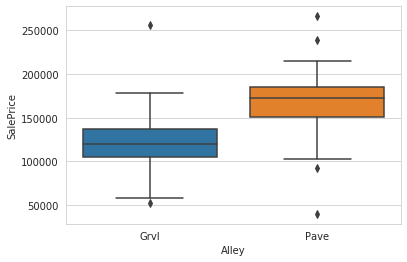

In [80]:
sns.boxplot(train["Alley"], train["SalePrice"])

In [81]:
pd.value_counts(train["Alley"])

Grvl    50
Pave    41
Name: Alley, dtype: int64

#### Shape of the Property

Text(0.5, 1.0, 'Shape of the Plot')

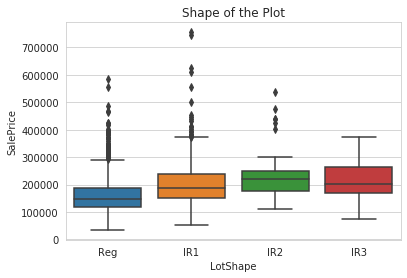

In [24]:
sns.boxplot(train["LotShape"], train["SalePrice"])
plt.title("Shape of the Plot")

Text(0.5, 1.0, 'Flatness of the Plot')

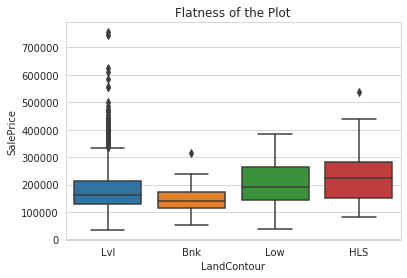

In [25]:
sns.boxplot(train["LandContour"], train["SalePrice"])
plt.title("Flatness of the Plot")

Text(0.5, 1.0, 'Configuration of the Plot')

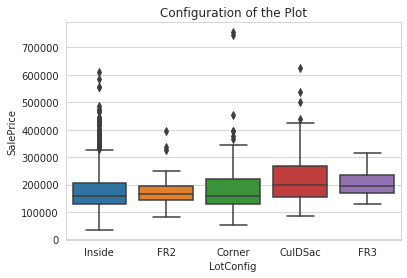

In [26]:
sns.boxplot(train["LotConfig"], train["SalePrice"])
plt.title("Configuration of the Plot")

In [27]:
train["SalePrice"].groupby(train["LotConfig"]).describe()

,count,mean,std,min,25%,50%,75%,max
LotConfig,,,,,,,,
Corner,263.0,181623.425856,84466.041222,52500.0,129250.0,160000.0,220000.0,755000.0
CulDSac,94.0,223854.617021,93117.546586,84000.0,156475.0,199262.0,269342.5,625000.0
FR2,47.0,177934.574468,62788.926829,81000.0,143500.0,165000.0,194500.0,394617.0
FR3,4.0,208475.000000,78379.222374,128000.0,169925.0,195450.0,234000.0,315000.0
Inside,1052.0,176938.047529,76426.805787,34900.0,128000.0,159697.5,207125.0,611657.0


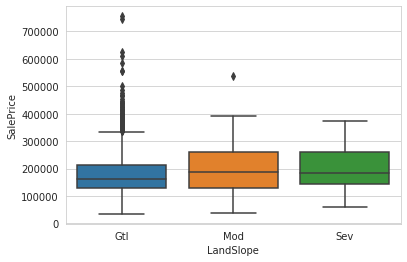

In [28]:
sns.boxplot(train["LandSlope"], train["SalePrice"])

In [29]:
train["SalePrice"].groupby(train["LandSlope"]).describe()

,count,mean,std,min,25%,50%,75%,max
LandSlope,,,,,,,,
Gtl,1382.0,179956.799566,78669.369151,34900.0,129900.0,161875.0,212000.0,755000.0
Mod,65.0,196734.138462,92375.358116,39300.0,130000.0,186700.0,259500.0,538000.0
Sev,13.0,204379.230769,86729.922409,61000.0,143000.0,185000.0,260000.0,375000.0


#### Utilities

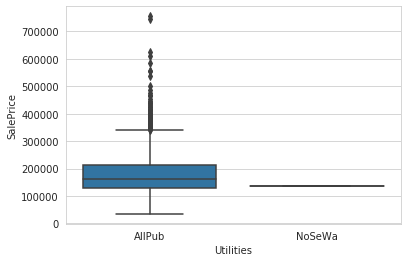

In [30]:
sns.boxplot(train["Utilities"], train["SalePrice"])

In [31]:
pd.value_counts(train["Utilities"])

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

#### Neighborhood

Text(0.5, 1.0, 'Neighborhood the Property is Located In')

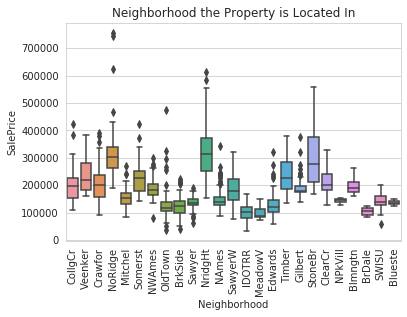

In [32]:
sns.boxplot(train["Neighborhood"], train["SalePrice"])
plt.xticks(rotation = "vertical")
plt.title("Neighborhood the Property is Located In")

In [33]:
train["SalePrice"].groupby(train["Neighborhood"]).describe()

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
Blmngtn,17.0,194870.882353,30393.229219,159895.0,174000.00,191000.0,213490.00,264561.0
Blueste,2.0,137500.000000,19091.883092,124000.0,130750.00,137500.0,144250.00,151000.0
BrDale,16.0,104493.750000,14330.176493,83000.0,91000.00,106000.0,118000.00,125000.0
BrkSide,58.0,124834.051724,40348.689270,39300.0,100500.00,124300.0,141175.00,223500.0
ClearCr,28.0,212565.428571,50231.538993,130000.0,183750.00,200250.0,242225.00,328000.0
CollgCr,150.0,197965.773333,51403.666438,110000.0,152958.75,197200.0,225725.00,424870.0
Crawfor,51.0,210624.725490,68866.395472,90350.0,159250.00,200624.0,239000.00,392500.0
Edwards,100.0,128219.700000,43208.616459,58500.0,101500.00,121750.0,145225.00,320000.0
Gilbert,79.0,192854.506329,35986.779085,141000.0,174000.00,181000.0,197200.00,377500.0


#### Conditions of The Property

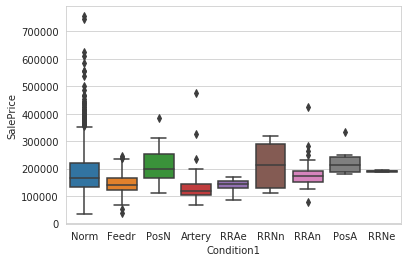

In [34]:
sns.boxplot(train["Condition1"], train["SalePrice"])

In [35]:
train["SalePrice"].groupby(train["Condition1"]).describe()

,count,mean,std,min,25%,50%,75%,max
Condition1,,,,,,,,
Artery,48.0,135091.666667,66226.660548,66500.0,105000.00,119550.0,143000.0,475000.0
Feedr,81.0,142475.481481,42157.290117,40000.0,121600.00,140000.0,167500.0,244600.0
Norm,1260.0,184495.492063,81256.980125,34900.0,131500.00,166500.0,219500.0,755000.0
PosA,8.0,225875.000000,52348.932313,180000.0,188750.00,212500.0,244000.0,335000.0
PosN,19.0,215184.210526,65256.536609,109500.0,167250.00,200000.0,252250.0,385000.0
RRAe,11.0,138400.000000,24030.813553,87000.0,127750.00,142500.0,156500.0,171000.0
RRAn,26.0,184396.615385,66177.922070,79500.0,152393.75,171495.0,190105.0,423000.0
RRNe,2.0,190750.000000,5303.300859,187000.0,188875.00,190750.0,192625.0,194500.0
RRNn,5.0,212400.000000,93823.238060,110000.0,128000.00,214000.0,290000.0,320000.0


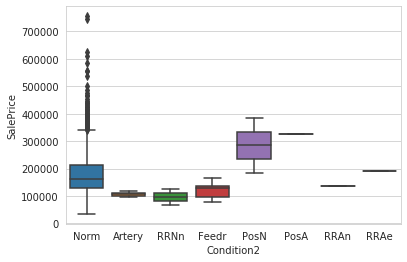

In [36]:
sns.boxplot(train["Condition2"], train["SalePrice"])

In [37]:
train["SalePrice"].groupby(train["Condition2"]).describe()

,count,mean,std,min,25%,50%,75%,max
Condition2,,,,,,,,
Artery,2.0,106500.000000,16263.455967,95000.0,100750.0,106500.0,112250.0,118000.0
Feedr,6.0,121166.666667,33544.994659,79500.0,95500.0,127500.0,137000.0,167500.0
Norm,1445.0,181169.405536,79337.735547,34900.0,130000.0,163500.0,214000.0,755000.0
PosA,1.0,325000.000000,NaN,325000.0,325000.0,325000.0,325000.0,325000.0
PosN,2.0,284875.000000,141598.132933,184750.0,234812.5,284875.0,334937.5,385000.0
RRAe,1.0,190000.000000,NaN,190000.0,190000.0,190000.0,190000.0,190000.0
RRAn,1.0,136905.000000,NaN,136905.0,136905.0,136905.0,136905.0,136905.0
RRNn,2.0,96750.000000,39951.533137,68500.0,82625.0,96750.0,110875.0,125000.0


#### Building/House Type

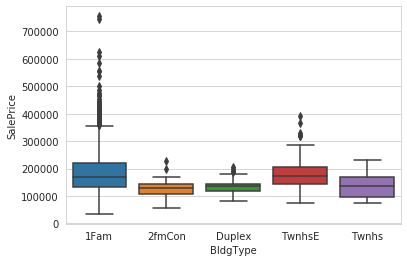

In [38]:
sns.boxplot(train["BldgType"], train["SalePrice"])

In [39]:
train["SalePrice"].groupby(train["BldgType"]).describe()

,count,mean,std,min,25%,50%,75%,max
BldgType,,,,,,,,
1Fam,1220.0,185763.807377,82648.502922,34900.0,131475.0,167900.0,222000.0,755000.0
2fmCon,31.0,128432.258065,35458.545158,55000.0,106875.0,127500.0,142500.0,228950.0
Duplex,52.0,133541.076923,27833.249197,82000.0,118375.0,135980.0,145000.0,206300.0
Twnhs,43.0,135911.627907,41013.222080,75000.0,95750.0,137500.0,168750.0,230000.0
TwnhsE,114.0,181959.342105,60626.108918,75500.0,143187.5,172200.0,207375.0,392500.0


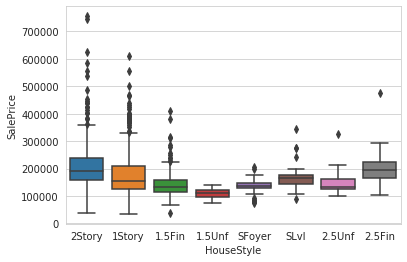

In [40]:
sns.boxplot(train["HouseStyle"], train["SalePrice"])

In [41]:
train["SalePrice"].groupby(train["HouseStyle"]).describe()

,count,mean,std,min,25%,50%,75%,max
HouseStyle,,,,,,,,
1.5Fin,154.0,143116.740260,54277.941119,37900.0,114625.0,132000.0,159325.5,410000.0
1.5Unf,14.0,110150.000000,19036.473090,76000.0,98175.0,111250.0,120500.0,139400.0
1Story,726.0,175985.477961,77055.715011,34900.0,127000.0,154750.0,209350.0,611657.0
2.5Fin,8.0,220000.000000,118211.976671,104000.0,164250.0,194000.0,223750.0,475000.0
2.5Unf,11.0,157354.545455,63934.128032,101000.0,125000.0,133900.0,163500.0,325000.0
2Story,445.0,210051.764045,87339.213570,40000.0,159500.0,190000.0,240000.0,755000.0
SFoyer,37.0,135074.486486,30480.898192,75500.0,127500.0,135960.0,148000.0,206300.0
SLvl,65.0,166703.384615,38305.161339,91000.0,145000.0,164500.0,178000.0,345000.0


#### Overall Condition/Quality

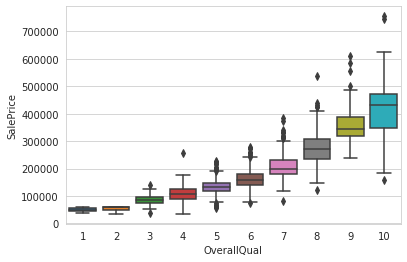

In [42]:
sns.boxplot(train["OverallQual"], train["SalePrice"])

#### Roof Info

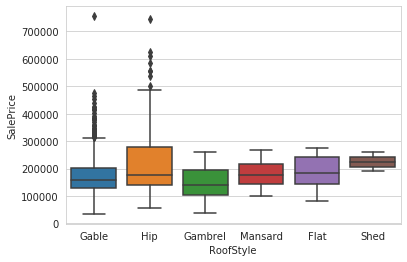

In [44]:
sns.boxplot(train["RoofStyle"], train["SalePrice"])

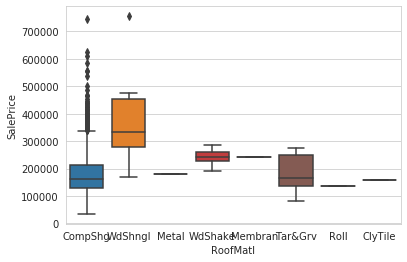

In [45]:
sns.boxplot(train["RoofMatl"], train["SalePrice"])

In [46]:
train["SalePrice"].groupby(train["RoofMatl"]).describe()

,count,mean,std,min,25%,50%,75%,max
RoofMatl,,,,,,,,
ClyTile,1.0,160000.000000,NaN,160000.0,160000.0,160000.0,160000.0,160000.0
CompShg,1434.0,179803.679219,77722.388636,34900.0,129900.0,162000.0,213000.0,745000.0
Membran,1.0,241500.000000,NaN,241500.0,241500.0,241500.0,241500.0,241500.0
Metal,1.0,180000.000000,NaN,180000.0,180000.0,180000.0,180000.0,180000.0
Roll,1.0,137000.000000,NaN,137000.0,137000.0,137000.0,137000.0,137000.0
Tar&Grv,11.0,185406.363636,65430.141720,82000.0,136000.0,167000.0,249000.0,274970.0
WdShake,5.0,241400.000000,36218.779659,190000.0,228000.0,242000.0,260000.0,287000.0
WdShngl,6.0,390250.000000,206969.019421,168500.0,278500.0,332500.0,452500.0,755000.0


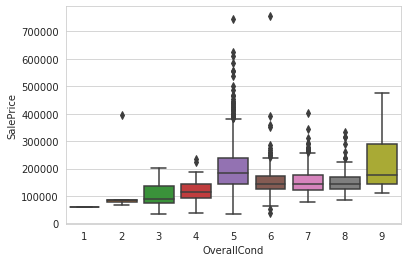

In [47]:
sns.boxplot(train["OverallCond"], train["SalePrice"])

In [48]:
train["SalePrice"].groupby(train["OverallCond"]).describe()

,count,mean,std,min,25%,50%,75%,max
OverallCond,,,,,,,,
1,1.0,61000.000000,NaN,61000.0,61000.0,61000.0,61000.0,61000.0
2,5.0,141986.400000,141342.813488,67000.0,76500.0,85000.0,87000.0,394432.0
3,25.0,101929.400000,44852.490403,35311.0,76000.0,89500.0,135000.0,200624.0
4,57.0,120438.438596,38922.525907,40000.0,92900.0,115000.0,143000.0,235000.0
5,821.0,203146.914738,85117.319416,34900.0,144000.0,185000.0,239686.0,745000.0
6,252.0,153961.591270,60737.969824,37900.0,124375.0,142750.0,171875.0,755000.0
7,205.0,158145.487805,53468.189431,79900.0,123500.0,145000.0,178000.0,402000.0
8,72.0,155651.736111,52375.144681,84500.0,125375.0,142500.0,170750.0,335000.0
9,22.0,216004.545455,96485.974689,110500.0,143500.0,176200.0,287875.0,475000.0


#### Exterior of Property

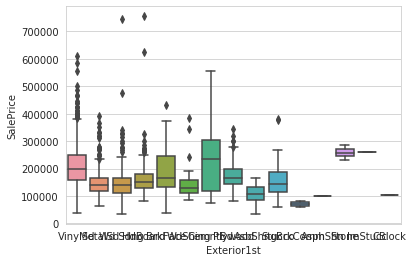

In [50]:
sns.boxplot(train["Exterior1st"], train["SalePrice"])

In [51]:
train["SalePrice"].groupby(train["Exterior1st"]).describe()

,count,mean,std,min,25%,50%,75%,max
Exterior1st,,,,,,,,
AsbShng,20.0,107385.550000,33756.480660,35311.0,85750.0,108000.0,133500.0,165500.0
AsphShn,1.0,100000.000000,NaN,100000.0,100000.0,100000.0,100000.0,100000.0
BrkComm,2.0,71000.000000,15556.349186,60000.0,65500.0,71000.0,76500.0,82000.0
BrkFace,50.0,194573.000000,82841.914370,40000.0,134525.0,165750.0,245125.0,430000.0
CBlock,1.0,105000.000000,NaN,105000.0,105000.0,105000.0,105000.0,105000.0
CemntBd,61.0,231690.655738,120575.621318,75000.0,119500.0,236500.0,303477.0,556581.0
HdBoard,222.0,163077.450450,66305.714164,83000.0,129625.0,149900.0,179900.0,755000.0
ImStucc,1.0,262000.000000,NaN,262000.0,262000.0,262000.0,262000.0,262000.0
MetalSd,220.0,149422.177273,54776.408990,62383.0,117750.0,139000.0,164775.0,392000.0


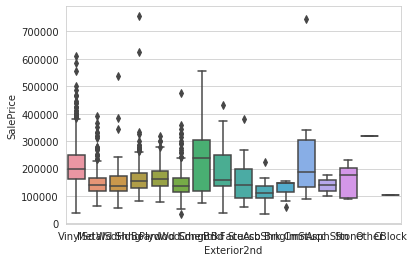

In [52]:
sns.boxplot(train["Exterior2nd"], train["SalePrice"])

In [53]:
 train["SalePrice"].groupby(train["Exterior2nd"]).describe()

,count,mean,std,min,25%,50%,75%,max
Exterior2nd,,,,,,,,
AsbShng,20.0,114060.550000,42315.043608,35311.0,94000.0,111000.0,135500.00,225000.0
AsphShn,3.0,138000.000000,37509.998667,100000.0,119500.0,139000.0,157000.00,175000.0
Brk Cmn,7.0,126714.285714,38693.084161,60000.0,114000.0,147000.0,148500.00,155000.0
BrkFace,25.0,195818.000000,95097.551756,40000.0,137000.0,160000.0,250000.00,430000.0
CBlock,1.0,105000.000000,NaN,105000.0,105000.0,105000.0,105000.00,105000.0
CmentBd,60.0,230093.833333,116140.396221,75000.0,118375.0,238750.0,304082.75,556581.0
HdBoard,207.0,167661.565217,70061.078357,83000.0,130500.0,155000.0,182500.00,755000.0
ImStucc,10.0,252070.000000,193176.672447,88000.0,131250.0,187600.0,305500.00,745000.0
MetalSd,214.0,149803.172897,55078.595310,62383.0,118625.0,138750.0,164525.00,392000.0


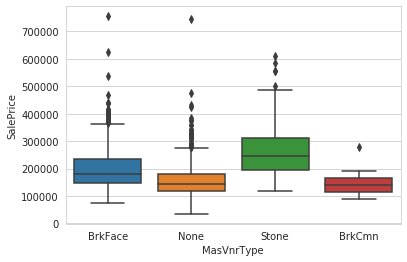

In [54]:
sns.boxplot(train["MasVnrType"], train["SalePrice"])

([<matplotlib.axis.XTick at 0x7fee5df5c7b8>,
 <a list of 4 Text xticklabel objects>)

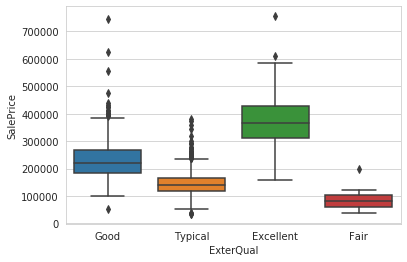

In [55]:
sns.boxplot(train["ExterQual"], train["SalePrice"])
plt.xticks(np.arange(4), labels = ("Good", "Typical", "Excellent", "Fair"))

([<matplotlib.axis.XTick at 0x7fee5def1080>,
 <a list of 5 Text xticklabel objects>)

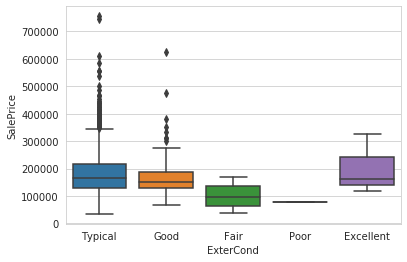

In [56]:
sns.boxplot(train["ExterCond"], train["SalePrice"])
plt.xticks(np.arange(5), ("Typical", "Good", "Fair", "Poor", "Excellent"))

In [57]:
train["SalePrice"].groupby(train["ExterCond"]).describe()

,count,mean,std,min,25%,50%,75%,max
ExterCond,,,,,,,,
Ex,3.0,201333.333333,109235.220205,118000.0,139500.0,161000.0,243000.00,325000.0
Fa,28.0,102595.142857,40094.383940,39300.0,65500.0,95750.0,137750.00,169500.0
Gd,146.0,168897.568493,72608.303632,68400.0,128625.0,151250.0,187375.00,625000.0
Po,1.0,76500.000000,NaN,76500.0,76500.0,76500.0,76500.00,76500.0
TA,1282.0,184034.896256,79806.257233,34900.0,131100.0,167370.0,217334.25,755000.0


#### Foundation

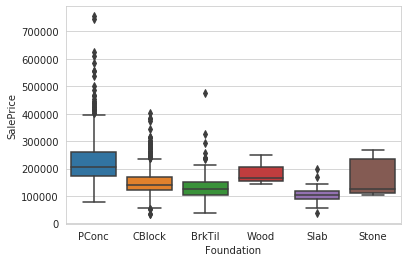

In [59]:
sns.boxplot(train["Foundation"], train["SalePrice"])

#### Basement

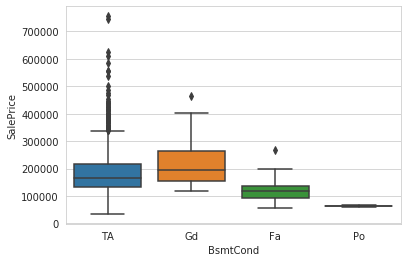

In [61]:
sns.boxplot(train["BsmtCond"], train["SalePrice"])

In [62]:
train["SalePrice"].groupby(train["BsmtCond"]).describe()

,count,mean,std,min,25%,50%,75%,max
BsmtCond,,,,,,,,
Fa,45.0,121809.533333,43467.796975,55000.0,91500.0,118500.0,137900.0,265979.0
Gd,65.0,213599.907692,72663.155026,119000.0,155000.0,193879.0,264561.0,465000.0
Po,2.0,64000.000000,4242.640687,61000.0,62500.0,64000.0,65500.0,67000.0
TA,1311.0,183632.620900,79515.388449,34900.0,132500.0,165000.0,215000.0,755000.0


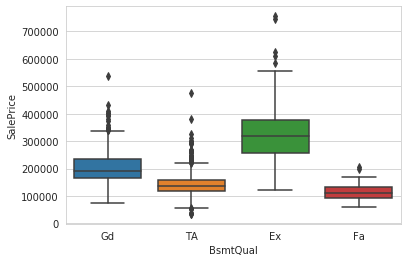

In [63]:
sns.boxplot(train["BsmtQual"], train["SalePrice"])

In [64]:
train["SalePrice"].groupby(train["ExterQual"]).describe()

,count,mean,std,min,25%,50%,75%,max
ExterQual,,,,,,,,
Ex,52.0,367360.961538,116401.264200,160000.0,311404.0,364606.5,428788.50,755000.0
Fa,14.0,87985.214286,39826.918794,39300.0,60250.0,82250.0,102000.00,200000.0
Gd,488.0,231633.510246,71188.873899,52000.0,185000.0,220000.0,265984.25,745000.0
TA,906.0,144341.313466,42471.815703,34900.0,118589.5,139450.0,165500.00,381000.0


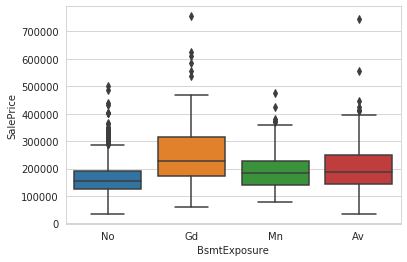

In [120]:
sns.boxplot(train["BsmtExposure"], train["SalePrice"])

In [121]:
train["SalePrice"].groupby(train["BsmtExposure"]).describe()

,count,mean,std,min,25%,50%,75%,max
BsmtExposure,,,,,,,,
Av,221.0,206643.420814,88655.504849,35311.0,145000.00,185850.0,248900.0,745000.0
Gd,134.0,257689.805970,118923.672583,61000.0,171975.00,226975.0,316325.0,755000.0
Mn,114.0,192789.657895,77335.442652,78000.0,138821.75,182450.0,228092.0,475000.0
No,953.0,165652.295908,60695.724915,34900.0,126000.00,154000.0,191000.0,501837.0


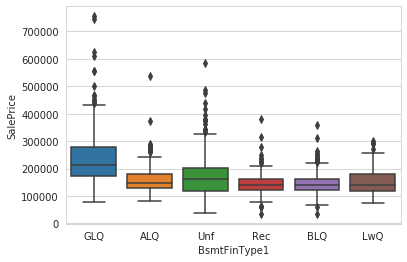

In [122]:
sns.boxplot(train["BsmtFinType1"], train["SalePrice"])

In [123]:
train["SalePrice"].groupby(train["BsmtFinType1"]).describe()

,count,mean,std,min,25%,50%,75%,max
BsmtFinType1,,,,,,,,
ALQ,220.0,161573.068182,50821.277231,81000.0,129000.0,149250.0,179925.00,538000.0
BLQ,148.0,149493.655405,47327.292126,35311.0,122750.0,139100.0,163100.00,359100.0
GLQ,418.0,235413.720096,93215.613258,80000.0,173125.0,213750.0,277375.00,755000.0
LwQ,74.0,151852.702703,50796.987083,75500.0,119000.0,139000.0,179125.00,301000.0
Rec,133.0,146889.248120,45190.118879,34900.0,123000.0,142000.0,161500.00,381000.0
Unf,430.0,170670.576744,72577.080129,37900.0,118100.0,161750.0,202623.75,582933.0


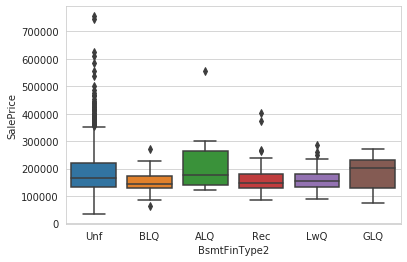

In [124]:
sns.boxplot(train["BsmtFinType2"], train["SalePrice"])

In [125]:
train["SalePrice"].groupby(train["BsmtFinType2"]).describe()

,count,mean,std,min,25%,50%,75%,max
BsmtFinType2,,,,,,,,
ALQ,19.0,209942.105263,104764.743411,123500.0,139000.0,174900.0,262500.0,555000.0
BLQ,33.0,151101.000000,41611.305388,62383.0,129000.0,143000.0,172500.0,271900.0
GLQ,14.0,180982.142857,64573.040359,75500.0,130250.0,203125.0,231500.0,270000.0
LwQ,46.0,164364.130435,43255.035241,88000.0,134500.0,154000.0,179750.0,287000.0
Rec,54.0,164917.129630,59183.277020,85000.0,129000.0,148750.0,180175.0,402000.0
Unf,1256.0,184694.690287,81275.313909,34900.0,132000.0,167000.0,219500.0,755000.0


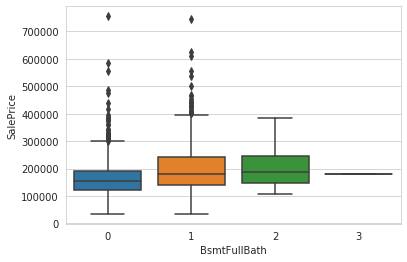

In [126]:
sns.boxplot(train["BsmtFullBath"], train["SalePrice"])

In [127]:
train["SalePrice"].groupby(train["BsmtFullBath"]).describe()

,count,mean,std,min,25%,50%,75%,max
BsmtFullBath,,,,,,,,
0,856.0,165521.640187,68137.819610,34900.0,120500.0,154150.0,192500.0,755000.0
1,588.0,202522.918367,88895.866415,35311.0,140000.0,178800.0,242250.0,745000.0
2,15.0,213063.066667,87308.196346,108959.0,147950.0,188000.0,244475.0,385000.0
3,1.0,179000.000000,NaN,179000.0,179000.0,179000.0,179000.0,179000.0


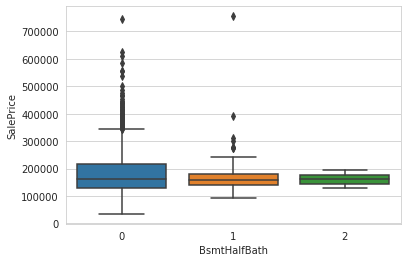

In [128]:
sns.boxplot(train["BsmtHalfBath"], train["SalePrice"])

In [129]:
train["SalePrice"].groupby(train["BsmtHalfBath"]).describe()

,count,mean,std,min,25%,50%,75%,max
BsmtHalfBath,,,,,,,,
0,1378.0,181230.330189,79303.224623,34900.0,129000.00,163250.0,215000.00,745000.0
1,80.0,176098.125000,82901.003355,91500.0,138625.00,159000.0,179925.00,755000.0
2,2.0,160850.500000,47164.729412,127500.0,144175.25,160850.5,177525.75,194201.0


#### Rooms

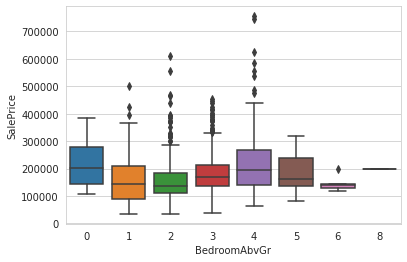

In [130]:
sns.boxplot(train["BedroomAbvGr"], train["SalePrice"])

In [131]:
train["SalePrice"].groupby(train["BedroomAbvGr"]).describe()

,count,mean,std,min,25%,50%,75%,max
BedroomAbvGr,,,,,,,,
0,6.0,221493.166667,106675.888935,108959.0,144250.0,202500.0,279500.0,385000.0
1,50.0,173162.420000,102975.067584,35311.0,87500.0,145250.0,208975.0,501837.0
2,358.0,158197.659218,78197.106241,34900.0,109900.0,137250.0,185000.0,611657.0
3,804.0,181056.870647,63793.924903,40000.0,136875.0,169945.0,214000.0,451950.0
4,213.0,220421.253521,109510.516383,64500.0,140000.0,193500.0,266500.0,755000.0
5,21.0,180819.047619,68472.480743,81000.0,135000.0,161500.0,240000.0,320000.0
6,7.0,143779.000000,26455.384839,119000.0,130450.0,141000.0,142776.5,200000.0
8,1.0,200000.000000,NaN,200000.0,200000.0,200000.0,200000.0,200000.0


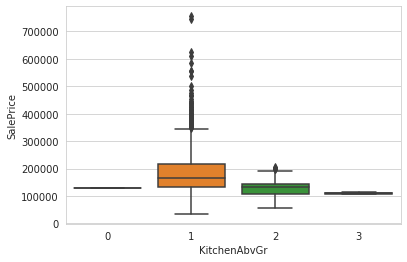

In [100]:
sns.boxplot(train["KitchenAbvGr"], train["SalePrice"])

In [132]:
train["SalePrice"].groupby(train["KitchenAbvGr"]).describe()

,count,mean,std,min,25%,50%,75%,max
KitchenAbvGr,,,,,,,,
0,1.0,127500.000000,NaN,127500.0,127500.0,127500.0,127500.00,127500.0
1,1392.0,183388.790230,80265.344315,34900.0,131300.0,165550.0,216877.75,755000.0
2,65.0,131096.153846,31483.474549,55000.0,108959.0,133900.0,145000.00,206300.0
3,2.0,109500.000000,4949.747468,106000.0,107750.0,109500.0,111250.00,113000.0


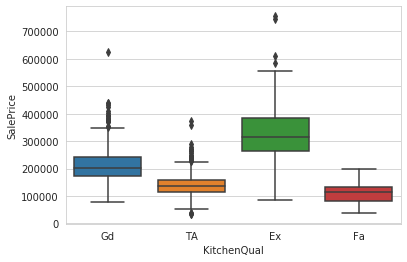

In [101]:
sns.boxplot(train["KitchenQual"], train["SalePrice"])

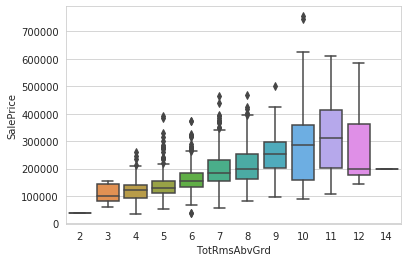

In [102]:
sns.boxplot(train["TotRmsAbvGrd"], train["SalePrice"])

In [134]:
train["SalePrice"].groupby(train["TotRmsAbvGrd"]).describe()

,count,mean,std,min,25%,50%,75%,max
TotRmsAbvGrd,,,,,,,,
2,1.0,39300.000000,NaN,39300.0,39300.0,39300.0,39300.0,39300.0
3,17.0,111217.647059,33108.103904,60000.0,81000.0,100000.0,143000.0,155900.0
4,97.0,122844.628866,41661.805370,34900.0,93000.0,120500.0,140000.0,260000.0
5,275.0,141550.749091,49656.905700,52000.0,112500.0,130250.0,156000.0,392500.0
6,402.0,161303.296020,48707.372941,37900.0,131625.0,155000.0,185000.0,374000.0
7,329.0,196666.784195,64404.686026,55000.0,155000.0,184100.0,230000.0,465000.0
8,187.0,213427.529412,73985.715639,81000.0,160500.0,200000.0,254096.5,466500.0
9,75.0,252988.173333,83131.922273,98000.0,200362.0,252000.0,298000.0,501837.0
10,47.0,296279.170213,155027.992122,90000.0,160000.0,285000.0,360509.5,755000.0


#### Functionality

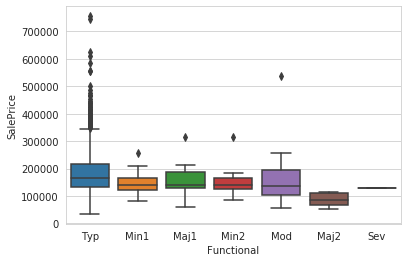

In [104]:
sns.boxplot(train["Functional"], train["SalePrice"])

In [136]:
train["SalePrice"].groupby(train["Functional"]).describe()

,count,mean,std,min,25%,50%,75%,max
Functional,,,,,,,,
Maj1,14.0,153948.142857,64503.775815,60000.0,130000.0,140750.0,189125.0,315000.0
Maj2,5.0,85800.000000,27086.897201,52000.0,67000.0,85000.0,110000.0,115000.0
Min1,31.0,146385.483871,38089.572487,82000.0,123750.0,139000.0,167450.0,256000.0
Min2,34.0,144240.647059,41215.354652,87000.0,124250.0,140000.0,164237.5,316600.0
Mod,15.0,168393.333333,118938.666467,55000.0,102750.0,137900.0,195000.0,538000.0
Sev,1.0,129000.000000,NaN,129000.0,129000.0,129000.0,129000.0,129000.0
Typ,1360.0,183429.147059,80017.959658,34900.0,131300.0,165500.0,217125.0,755000.0


#### Fireplaces

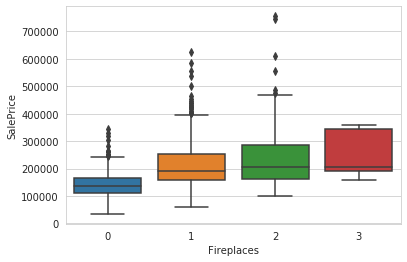

In [137]:
sns.boxplot(train["Fireplaces"], train["SalePrice"])

In [138]:
train["SalePrice"].groupby(train["Fireplaces"]).describe()

,count,mean,std,min,25%,50%,75%,max
Fireplaces,,,,,,,,
0,690.0,141331.482609,44389.786884,34900.0,112000.0,135000.0,164375.0,342643.0
1,650.0,211843.909231,79531.825318,60000.0,158000.0,189975.0,254675.0,625000.0
2,115.0,240588.539130,117451.800525,100000.0,160750.0,206900.0,284500.0,755000.0
3,5.0,252000.000000,93313.986090,160000.0,190000.0,205000.0,345000.0,360000.0


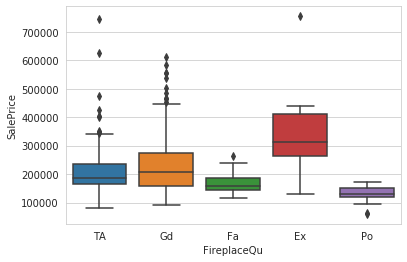

In [139]:
sns.boxplot(train["FireplaceQu"], train["SalePrice"])

In [141]:
train["SalePrice"].groupby(train["FireplaceQu"]).describe()

,count,mean,std,min,25%,50%,75%,max
FireplaceQu,,,,,,,,
Ex,24.0,337712.500000,123611.471764,130500.0,265070.00,314250.0,411324.5,755000.0
Fa,33.0,167298.484848,34287.717564,117000.0,143000.00,158000.0,187000.0,262000.0
Gd,380.0,226351.415789,91123.148369,90350.0,159671.25,206950.0,274977.5,611657.0
Po,20.0,129764.150000,31080.842115,60000.0,120925.00,131500.0,149500.0,172000.0
TA,313.0,205723.488818,71367.028772,82500.0,165000.00,187500.0,236000.0,745000.0


#### Garages

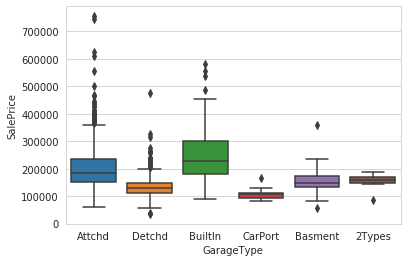

In [142]:
sns.boxplot(train["GarageType"], train["SalePrice"])

In [143]:
train["SalePrice"].groupby(train["GarageType"]).describe()

,count,mean,std,min,25%,50%,75%,max
GarageType,,,,,,,,
2Types,6.0,151283.333333,34917.068415,87000.0,146250.0,159000.0,170250.00,186700.0
Attchd,870.0,202892.656322,77146.621778,60000.0,150000.0,185000.0,235000.00,755000.0
Basment,19.0,160570.684211,63967.283574,55993.0,132250.0,148000.0,174000.00,359100.0
BuiltIn,88.0,254751.738636,102230.854394,91000.0,180750.0,227500.0,300719.25,582933.0
CarPort,9.0,109962.111111,24638.183681,82000.0,95000.0,108000.0,110000.00,164900.0
Detchd,387.0,134091.162791,41391.549953,35311.0,110000.0,129500.0,147700.00,475000.0


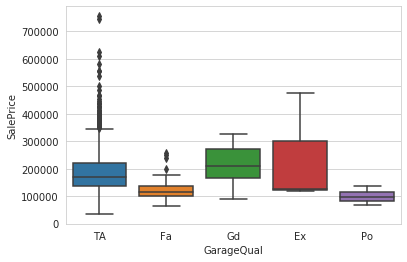

In [144]:
sns.boxplot(train["GarageQual"], train["SalePrice"])

In [145]:
train["SalePrice"].groupby(train["GarageQual"]).describe()

,count,mean,std,min,25%,50%,75%,max
GarageQual,,,,,,,,
Ex,3.0,241000.000000,202680.166765,120500.0,124000.0,127500.0,301250.0,475000.0
Fa,48.0,123573.354167,42971.440985,64500.0,99500.0,115000.0,135612.5,256000.0
Gd,14.0,215860.714286,74126.739021,90350.0,165975.0,209115.0,271852.5,325000.0
Po,3.0,100166.666667,35143.752408,67000.0,81750.0,96500.0,116750.0,137000.0
TA,1311.0,187489.836003,78774.948567,35311.0,135500.0,170000.0,220000.0,755000.0


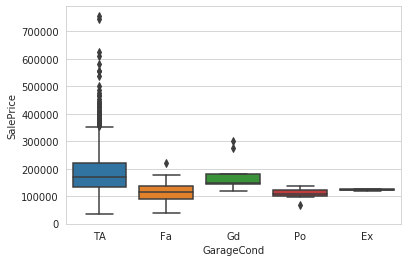

In [146]:
sns.boxplot(train["GarageCond"], train["SalePrice"])

In [147]:
train["SalePrice"].groupby(train["GarageCond"]).describe()

,count,mean,std,min,25%,50%,75%,max
GarageCond,,,,,,,,
Ex,2.0,124000.000000,4949.747468,120500.0,122250.0,124000.0,125750.0,127500.0
Fa,35.0,114654.028571,36420.903588,40000.0,89000.0,114504.0,137500.0,220000.0
Gd,9.0,179930.000000,64769.318354,118500.0,144000.0,148000.0,180000.0,302000.0
Po,7.0,108500.000000,22662.377045,67000.0,101250.0,108000.0,122500.0,137000.0
TA,1326.0,187885.735294,79103.322640,35311.0,135000.0,170000.0,221000.0,755000.0


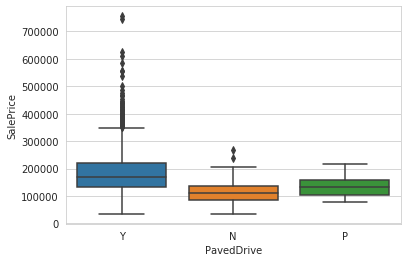

In [112]:
sns.boxplot(train["PavedDrive"], train["SalePrice"])

In [148]:
train["SalePrice"].groupby(train["PavedDrive"]).describe()

,count,mean,std,min,25%,50%,75%,max
PavedDrive,,,,,,,,
N,90.0,115039.122222,44352.523309,34900.0,84625.0,111000.0,137100.0,265979.0
P,30.0,132330.000000,33503.030228,79500.0,102750.0,132250.0,159100.0,215000.0
Y,1340.0,186433.973881,79665.503047,35311.0,134337.5,168500.0,220000.0,755000.0


#### Pool

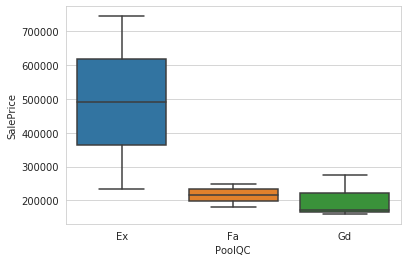

In [114]:
sns.boxplot(train["PoolQC"], train["SalePrice"])

#### Fence

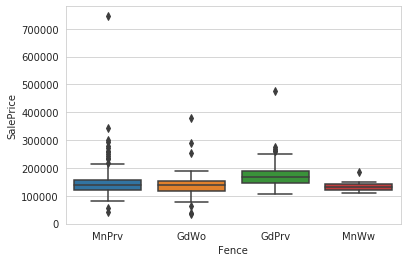

In [116]:
sns.boxplot(train["Fence"], train["SalePrice"])

In [149]:
train["SalePrice"].groupby(train["Fence"]).describe()

,count,mean,std,min,25%,50%,75%,max
Fence,,,,,,,,
GdPrv,59.0,178927.457627,56757.237563,108000.0,144950.0,167500.0,189475.0,475000.0
GdWo,54.0,140379.314815,53592.585059,34900.0,118625.0,138750.0,151750.0,381000.0
MnPrv,157.0,148751.089172,66096.069463,40000.0,119900.0,137450.0,158000.0,745000.0
MnWw,11.0,134286.363636,21781.805376,110000.0,121500.0,130000.0,143000.0,187000.0


#### Sales Info

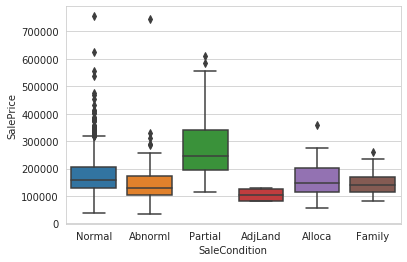

In [150]:
sns.boxplot(train["SaleCondition"], train["SalePrice"])

In [151]:
train["SalePrice"].groupby(train["SaleCondition"]).describe()

,count,mean,std,min,25%,50%,75%,max
SaleCondition,,,,,,,,
Abnorml,101.0,146526.623762,82796.213395,34900.0,104000.00,130000.0,172500.0,745000.0
AdjLand,4.0,104125.000000,26135.464411,81000.0,81750.00,104000.0,126375.0,127500.0
Alloca,12.0,167377.416667,84460.527502,55993.0,116383.25,148145.0,202043.0,359100.0
Family,20.0,149600.000000,47820.002421,82500.0,115500.00,140500.0,170250.0,259000.0
Normal,1198.0,175202.219533,69713.636280,39300.0,130000.00,160000.0,205000.0,755000.0
Partial,125.0,272291.752000,103696.404119,113000.0,193879.00,244600.0,339750.0,611657.0


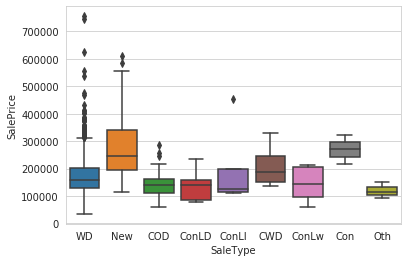

In [119]:
sns.boxplot(train["SaleType"], train["SalePrice"])

In [153]:
train["SalePrice"].groupby(train["SaleType"]).describe()

,count,mean,std,min,25%,50%,75%,max
SaleType,,,,,,,,
COD,43.0,143973.255814,47098.294314,60000.0,112000.00,139000.0,160500.00,287000.0
CWD,4.0,210600.000000,86421.486526,136000.0,152500.00,188750.0,246850.00,328900.0
Con,2.0,269600.000000,76933.217793,215200.0,242400.00,269600.0,296800.00,324000.0
ConLD,9.0,138780.888889,53876.560647,79900.0,85000.00,140000.0,160000.00,235128.0
ConLI,5.0,200390.000000,145282.519595,110000.0,115000.00,125000.0,200000.00,451950.0
ConLw,5.0,143700.000000,67291.901444,60000.0,95000.00,144000.0,207500.00,212000.0
New,122.0,274945.418033,103239.582158,113000.0,194050.25,247453.0,341919.75,611657.0
Oth,3.0,119850.000000,28441.035495,93500.0,104775.00,116050.0,133025.00,150000.0
WD,1267.0,173401.836622,71129.686245,34900.0,128925.00,158000.0,202950.00,755000.0


In [154]:
### Numerical Vars

### Conclusions from Analysis

### Feature Extraction and Creation

### Model Creation

#### Train Test Split

In [85]:
from sklearn.model_selection import train_test_split

In [168]:
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,1:-1], train.iloc[:,-1], test_size = .3, random_state = 84)

In [92]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [93]:
ridge = Ridge()
rf = RandomForestRegressor()